## Load and Visualize the Data
First, import the modules we will need.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [18]:
names =[
    'index',
    'location', 'country',                                                  # the country and location of the person
    'gender', 'age',                                                        # gender and age of the person
    'vis_wuhan', 'from_wuhan',                                              # whether the person visited wuhan or from wuhan
    'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', # symptoms appeared on the person
    'diff_sym_hos',                                                         # time before symptoms appear
    'result'                                                                # death or recovered
]
df = pd.read_csv("data.csv", names = names)
df.drop(index = 0, axis = 1, inplace = True)

In [19]:
df.head(6)

,index,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
1,0.0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
2,1.0,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
3,2.0,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
4,3.0,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
5,4.0,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
6,5.0,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


<Axes: xlabel='result'>

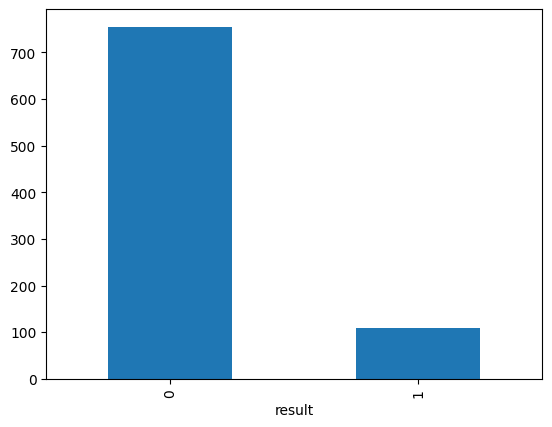

In [20]:
df["result"].value_counts().plot(kind="bar")

In [21]:
X_data = df[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos']].astype('float')
y_data = df['result'].astype('int')

X_train = X_data.iloc[:517,:]
y_train = y_data.iloc[:517]
X_validate = X_data.iloc[517:690,:]
y_validate = y_data.iloc[517:690]
X_test = X_data.iloc[690:,:]
y_test = y_data.iloc[690:]

# K Nearest Neighbors

## Train the Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

## Validate the Model

<Axes: >

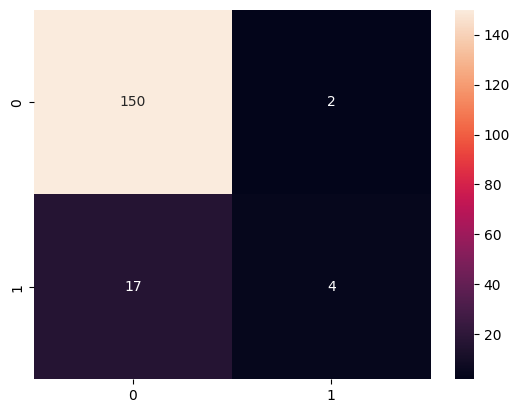

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
y_pred_validate = best_knn.predict(X_validate)
y_prob_validate = best_knn.predict_proba(X_validate)[:, 1]
precision = precision_score(y_validate, y_pred_validate)
recall = recall_score(y_validate, y_pred_validate)
f1 = f1_score(y_validate, y_pred_validate)
roc_auc = roc_auc_score(y_validate, y_prob_validate)
conf_matrix = confusion_matrix(y_validate, y_pred_validate)

sns.heatmap(conf_matrix, annot=True, fmt='.0f')

## Test the Model

<Axes: >

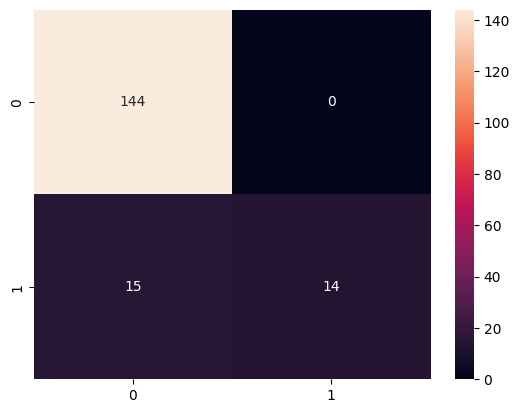

In [35]:
y_pred_test = best_knn.predict(X_test)
y_prob_test = best_knn.predict_proba(X_test)[:, 1]

# Compute test metrics
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_prob_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

sns.heatmap(conf_matrix_test, annot=True, fmt='.0f')

# Logistic Regression

## Train the Model

In [25]:
from sklearn import linear_model, preprocessing
regr = linear_model.LogisticRegression()
min_max_scaler = preprocessing.MinMaxScaler()

In [26]:
X_train_minmax = min_max_scaler.fit_transform(X_train)
regr.fit(X_train_minmax, y_train)
y_train_pred = regr.predict(X_train_minmax)

<Axes: >

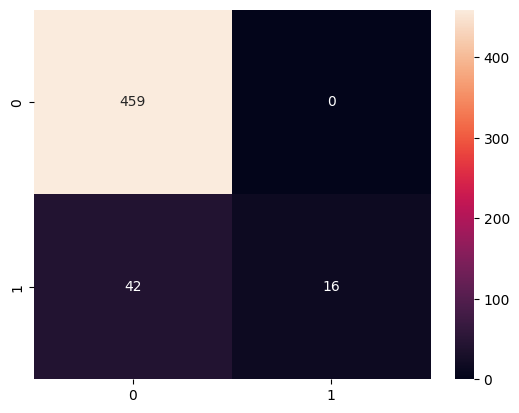

In [27]:
M = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = M.ravel()
sns.heatmap(M, annot=True, fmt='.0f')

## Validate the Model

In [28]:
X_validate_minmax = min_max_scaler.fit_transform(X_validate)
regr.fit(X_validate_minmax, y_validate)
y_validate_pred = regr.predict(X_validate_minmax)

<Axes: >

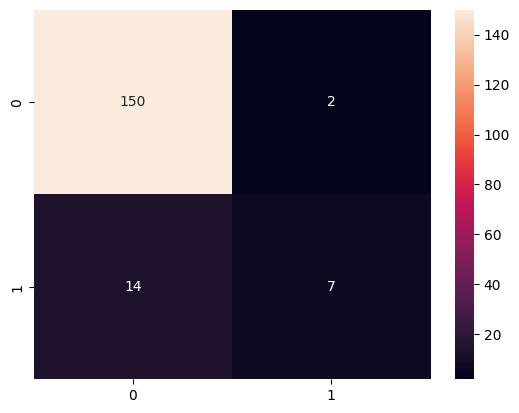

In [29]:
M = confusion_matrix(y_validate, y_validate_pred)
tn, fp, fn, tp = M.ravel()
sns.heatmap(M, annot=True, fmt='.0f')

## Test the Model

In [30]:
X_test_minmax = min_max_scaler.fit_transform(X_test)
regr.fit(X_test_minmax, y_test)
y_test_pred = regr.predict(X_test_minmax)

<Axes: >

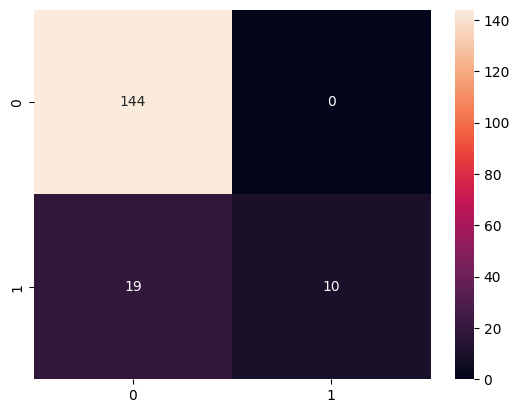

In [31]:
M = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = M.ravel()
sns.heatmap(M, annot=True, fmt='.0f')

# Descision Trees

## Train the Model

## Validate the Model

## Test the Model